In [30]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False


plt.style.use('default')

In [31]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeOneSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmmi10',
 'cmtt10',
 'cmss10',
 'cmsy10',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXSizeFourSym',
 'cmex10',
 'STIXGeneral',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmr10',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'Quicksand Medium',
 'Ubuntu',
 'DejaVu Serif',
 'URW Bookman',
 'URW Gothic',
 'P052',
 'Ubuntu Mono',
 'Ubuntu',
 'Nimbus Mono PS',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Nimbus Roman',
 'P052',
 'Quicksand',
 'DejaVu Sans',
 'NanumSquare',
 'DejaVu Sans',
 'Nimbus Roman',
 'Nimbus Mono PS',
 'DejaVu Sans Mono',
 'DejaVu Serif'

In [32]:
plt.rcParams['font.family'] = 'NanumGothic'

# 1. 데이터 불러오기

In [33]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [34]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [35]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [36]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [37]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


# 2. 데이터 분석하기
## 2-1. 월별 매출액 추세
필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)

월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.

힌트: groupby() 함수를 사용하세요.

In [38]:
sales_data.dtypes

결제일시    object
판매위치    object
상품명     object
결제방식    object
비고      object
판매수량     int64
결제금액    object
고객      object
dtype: object

In [39]:
sales_data['결제일시'] = sales_data['결제일시'].apply(lambda x: str(x)[:7])
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',','').astype(int)
month_payment = sales_data.groupby('결제일시')['결제금액'].sum()

In [88]:
month_payment

결제일시
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

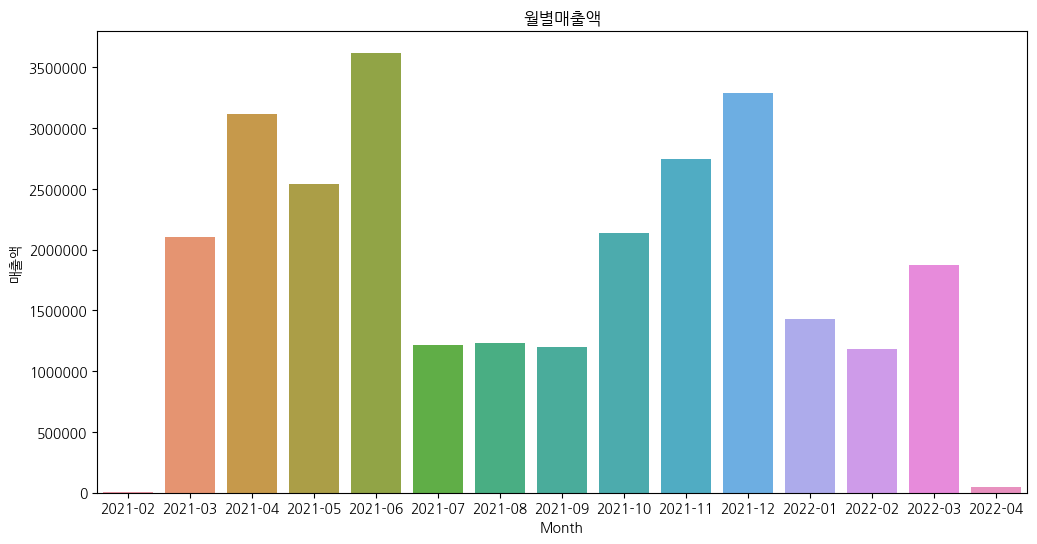

In [40]:
plt.figure(figsize = (12,6))
sns.barplot(x = month_payment.index, y = month_payment.values)
plt.xlabel('Month')
plt.ylabel('매출액')
plt.title('월별매출액')

# Y축의 단위 표현을 숫자 그대로 표현하기
yticks = np.arange(0, month_payment.max(), 500000)
plt.yticks(yticks, yticks.astype(int))
plt.show()

## 2-2. 가장 인기 있는 음식/음료(sales_data를 이용합니다.)

여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

힌트: value_counts() 함수를 사용하세요.

In [43]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507


In [44]:
sales_data['판매수량'].value_counts()

 1    6945
-1     160
Name: 판매수량, dtype: int64

In [42]:
sales_data['상품명'].value_counts()

김치볶음밥           1211
라면               756
짜장라면             457
치즈불고기볶음밥         423
계란추가             315
                ... 
녹차(HOT)            1
짜장라면(계란추가)         1
이어폰(커널형)           1
오늘은 한돈고추장불고기       1
오늘은 한돈간장불고기        1
Name: 상품명, Length: 100, dtype: int64

In [46]:
sales_data1 = sales_data[sales_data['판매수량']==1]

In [57]:
items_count = pd.DataFrame(sales_data1['상품명'].value_counts()[:10])
items_count.columns = ['판매량']

In [58]:
items_count

,판매량
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


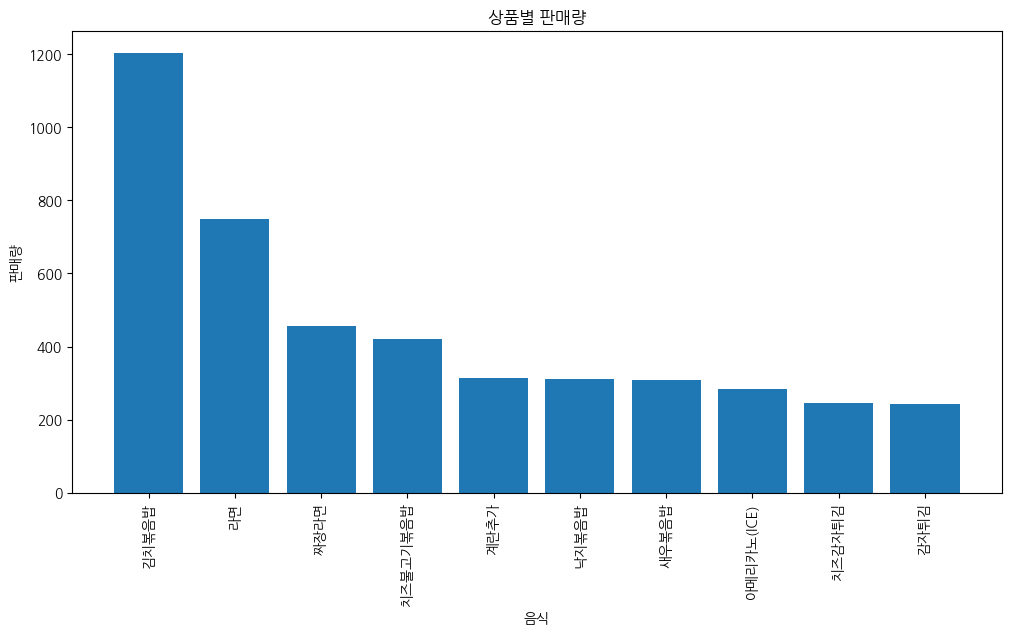

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(x=items_count.index, height=items_count['판매량'])
plt.xticks(rotation=90)
plt.xlabel('음식')
plt.ylabel('판매량')
plt.title('상품별 판매량')
plt.show()

## 2-3. 여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화

In [80]:
items_payment = sales_data1.groupby('상품명')['결제금액'].sum().sort_values(ascending=False)[:10]

In [83]:
items_payment = pd.DataFrame(items_payment)
items_payment.columns = ['판매금액']

In [95]:
items_payment['판매금액'].max()

6004400

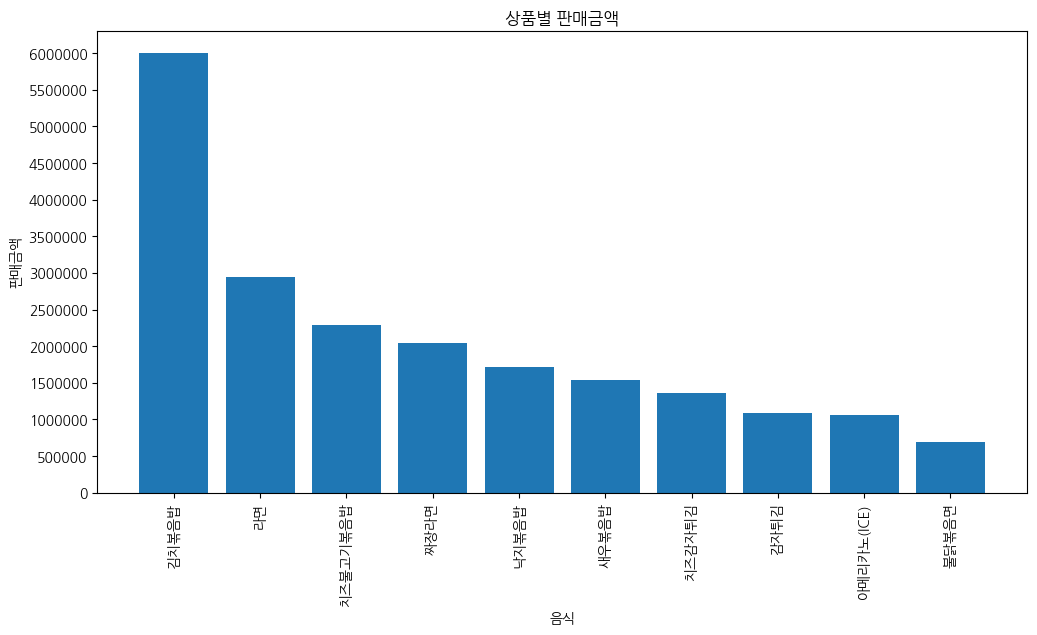

In [96]:
plt.figure(figsize=(12, 6))
plt.bar(x=items_payment.index, height=items_payment['판매금액'])
plt.xticks(rotation=90)
plt.xlabel('음식')
plt.ylabel('판매금액')
plt.title('상품별 판매금액')

# Y축의 단위 표현을 숫자 그대로 표현하기
yticks = np.arange(0, items_payment['판매금액'].max(),500000)
plt.yticks(yticks, yticks.astype(int))

plt.show()

## 2-4. 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)

여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

힌트: value_counts() 함수를 사용하세요.

In [97]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [120]:
aa = entry_data.groupby('요금제명')['금액'].sum().sort_values(ascending=False)[:10]

In [121]:
aa

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

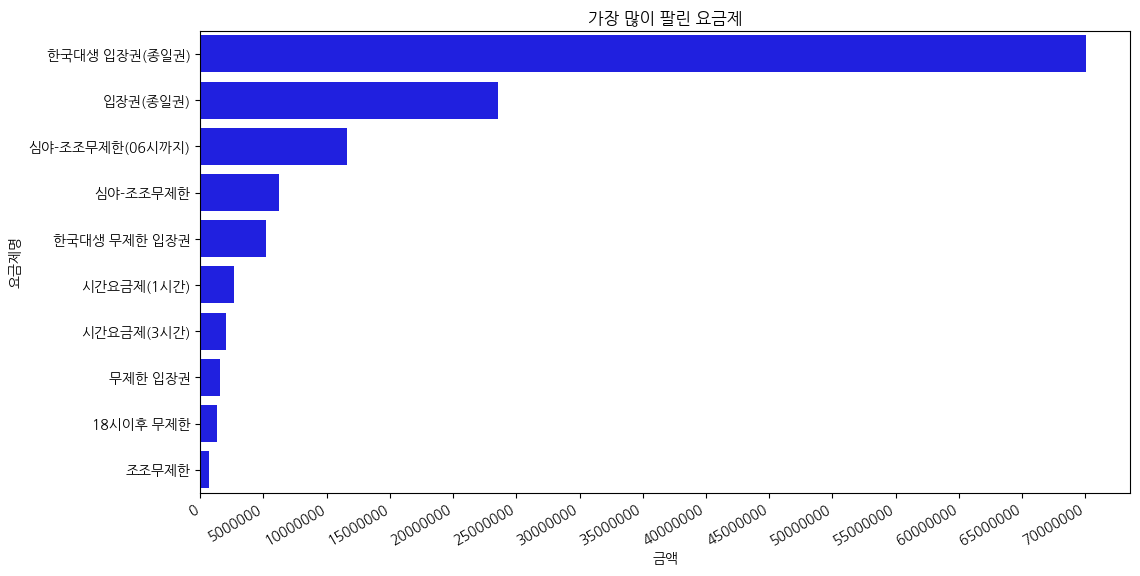

In [122]:
plt.figure(figsize=(12, 6))

sns.barplot(x=aa.values, y=aa.index, color='b')

plt.xlabel('금액')
plt.ylabel('요금제명')
plt.title('가장 많이 팔린 요금제')

# X축의 단위 표현을 숫자 그대로 표현하기
xticks = np.arange(0, aa.values.max(), 5000000)
plt.xticks(xticks, xticks.astype(int))
plt.xticks(rotation=30, ha='right')

plt.show()

## 요일별 매출

In [124]:
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [125]:
sales_data['결제일시'] = pd.to_datetime(sales_data['결제일시'])
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',','').astype(int)

In [126]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41:00,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04-01 19:41:00,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04-01 19:41:00,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04-01 19:41:00,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04-01 19:41:00,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507


In [127]:
# 날짜 데이터를 이용하여 요일 정보 추출
sales_data['weekday'] = sales_data['결제일시'].apply(lambda x: x.weekday())

In [128]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,weekday
0,2022-04-01 19:41:00,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,4
1,2022-04-01 19:41:00,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,4
2,2022-04-01 19:41:00,선불기1,라면,신용카드,결제완료,1,4000,customer275507,4
3,2022-04-01 19:41:00,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,4
4,2022-04-01 19:41:00,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,4
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21:00,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2
7101,2021-02-17 13:51:00,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2
7102,2021-02-17 13:51:00,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2
7103,2021-02-17 13:26:00,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2


In [129]:
# 요일별 매출 합계 계산
weekday_sales = sales_data.groupby('weekday')['결제금액'].sum()

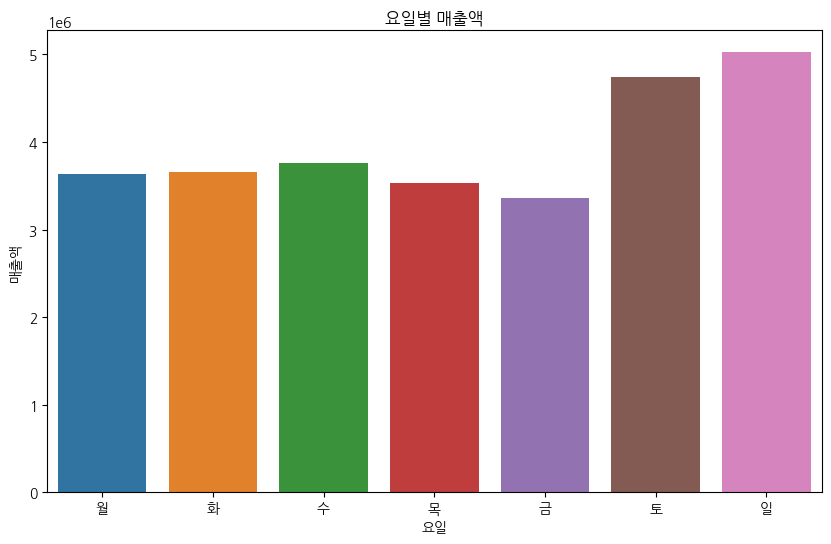

In [130]:
# 요일별 매출 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['월', '화', '수', '목', '금', '토', '일'])
plt.xlabel('요일')
plt.ylabel('매출액')
plt.title('요일별 매출액')
plt.show()

## 시간별 매출

In [131]:
sales_data['hour'] = sales_data['결제일시'].dt.hour
hourly_sales = sales_data.groupby('hour')['결제금액'].sum()

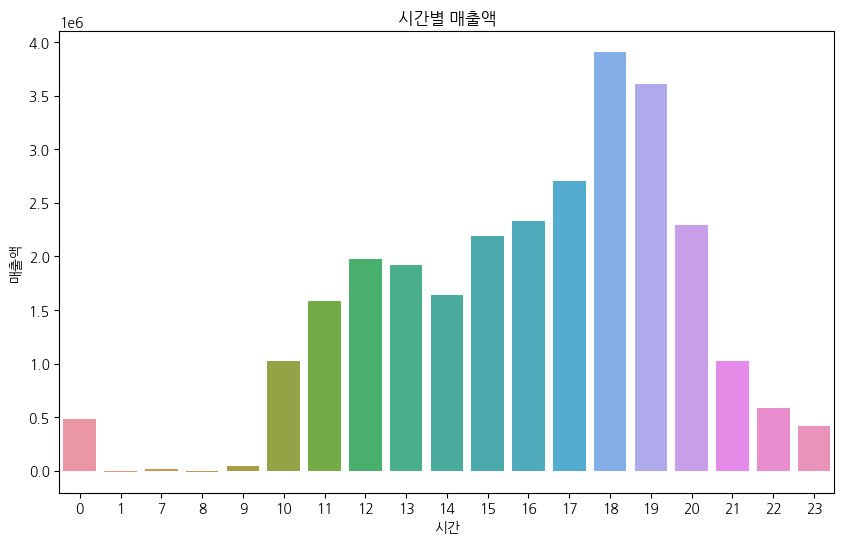

In [132]:
# 요일별 매출 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values)
plt.xlabel('시간')
plt.ylabel('매출액')
plt.title('시간별 매출액')
plt.show()